In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To Start with Association rules we need MLXTEND Library to do so
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Assignments/Association Rules/Online retail.xlsx")
data.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [ ]:
data.iloc[:,0]

0                                  burgers,meatballs,eggs
1                                                 chutney
2                                          turkey,avocado
3       mineral water,milk,energy bar,whole wheat rice...
4                                          low fat yogurt
                              ...                        
7495                        butter,light mayo,fresh bread
7496    burgers,frozen vegetables,eggs,french fries,ma...
7497                                              chicken
7498                                   escalope,green tea
7499      eggs,frozen smoothie,yogurt cake,low fat yogurt
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 7500, dtype: object

In [ ]:
data['Groc']=data.iloc[:,0]

In [ ]:
data.drop('shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',axis=1,inplace=True)

In [ ]:
data.head()

,Groc
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [ ]:
data1 =pd.get_dummies(data)
data1

,Groc_almonds,"Groc_almonds,cake,low fat yogurt","Groc_almonds,cookies","Groc_almonds,eggs","Groc_almonds,eggs,cookies","Groc_almonds,eggs,cooking oil,french fries,green tea","Groc_almonds,eggs,yogurt cake","Groc_almonds,french wine","Groc_almonds,french wine,green tea,french fries,escalope,strawberries,tomato juice,honey","Groc_almonds,pancakes,eggs,chocolate,french fries,mint",...,"Groc_yams,mineral water,energy bar,eggs,fresh bread","Groc_yams,mineral water,french fries","Groc_yams,mineral water,soup,milk,pancakes,whole wheat rice,barbecue sauce,carrots,chocolate,champagne","Groc_yams,mint",Groc_yogurt cake,"Groc_yogurt cake,candy bars","Groc_yogurt cake,energy drink","Groc_yogurt cake,honey","Groc_yogurt cake,low fat yogurt","Groc_yogurt cake,mint"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- After getting the dummies for the groceries we identify  that there are 5175 attributes with 7500 columns

In [ ]:
frequents_items = apriori(data1,min_support=0.0002,use_colnames=True)
frequents_items

,support,itemsets
0,0.000267,(Groc_almonds)
1,0.000933,(Groc_antioxydant juice)
2,0.000267,"(Groc_antioxydant juice,chocolate)"
3,0.000267,"(Groc_antioxydant juice,escalope)"
4,0.000267,(Groc_asparagus)
...,...,...
383,0.000267,"(Groc_whole wheat pasta,spaghetti,mineral wate..."
384,0.002400,(Groc_whole wheat rice)
385,0.001067,(Groc_yams)
386,0.003333,(Groc_yogurt cake)


- min_support: This parameter specifies the minimum support threshold. Support is the proportion of transactions that contain a particular itemset.
- 0.0002: This value means that an itemset must appear in at least 0.02% of the transactions to be considered frequent.

- the dataset contains no numerical values so we dont calculate the statistical measures for the data

<Axes: xlabel='itemsets'>

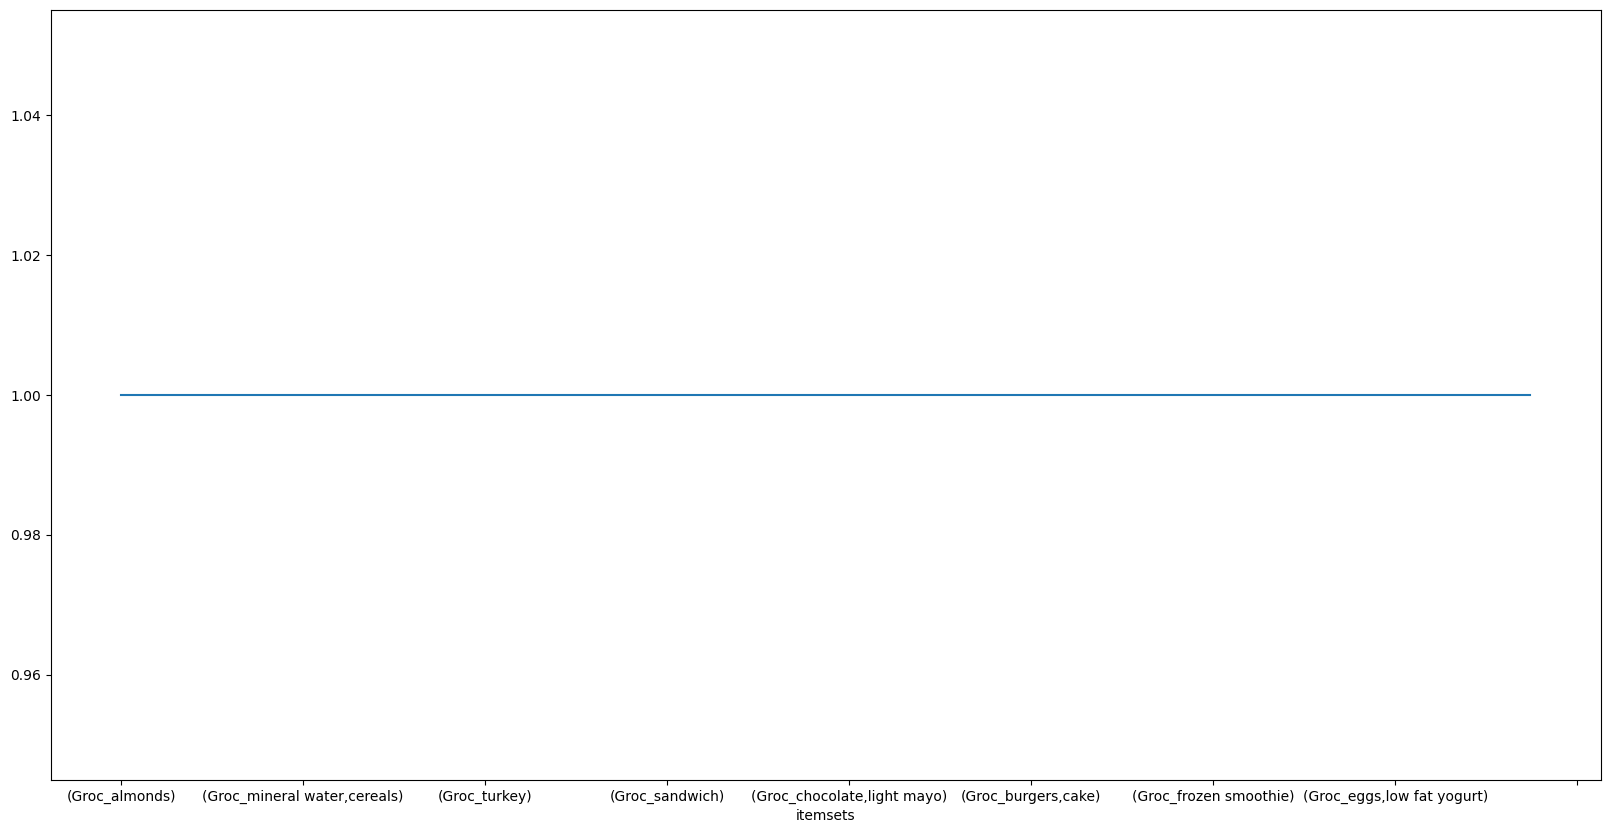

In [ ]:
plt.figure(figsize=(20,10))
frequents_items.itemsets.value_counts().plot()

In [ ]:
rules = association_rules(frequents_items, metric="lift", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
rules1 = association_rules(frequents_items, metric="lift", min_threshold=0.002)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
rules3 = association_rules(frequents_items, metric="lift", min_threshold=0.02)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


 - Association Rules find the patterns and hidden market associations between the products
 - for example when two products are bought together all the time no matter what then, those two products are associated and people will buy the other one when they bought one of those two products
 - Association rules identifies these type of associations between  different items

 **SO HERE THE ITEMS HAVE THE SUPPORT OF AROUND 0.002 SO WE CAN CONSIDER THERE ARE INDEPENDENT AND WONT HAVE ASSOCIATION FOR THE ITEMS**

## INTERVIEW QUESTIONS

### 1.	What is lift and why is it important in Association rules?

- Lift,It is the strength of any rule, which can be defined as below formula:

- Association Rule Learning
It is the ratio of the observed support measure and expected support if X and Y are independent of each other. It has three possible values:

- If Lift = 1: The probability of occurrence of antecedent and consequent is independent of each other.

- Lift >1: It determines the degree to which the two itemsets are dependent to each other.

- Lift <1: It tells us that one item is a substitute for other items, which means one item has a negative effect on another.

### 2.	What is support and Confidence. How do you calculate them?

**Support:**
- Support is the frequency of A or how frequently an item appears in the dataset. It is defined as the fraction of the transaction T that contains the itemset X. If there are X datasets, then for transactions T, it can be written as:
- **support** = frq(a&b)/T


**Confidence:**
- Confidence indicates how often the rule has been found to be true. Or how often the items X and Y occur together in the dataset when the occurrence of X is already given. It is the ratio of the transaction that contains X and Y to the number of records that contain X.

- **confidence** = freq(x,y)/freq(x)


###3.	What are some limitations or challenges of Association rules mining?

- **False Discoveries**:
  - Association rule mining can generate a large number of rules. Here, all the rules may not be meaningful or useful.
  - Some of these rules may be spurious or coincidental, and may not represent actual patterns or relationships in the data.
- **Limited Scope**:
  - Association rule mining is primarily designed to identify binary relationships between variables, and may not be able to detect more complex patterns or relationships.
  -  It may also miss important relationships that are not captured by the data.
- **Data Quality Issues**:
  - We need high-quality, reliable data to produce accurate results for association rule mining. If the data is incomplete, inaccurate, or inconsistent, the rules generated by the algorithm may be unreliable or misleading.
- **Computationally Intensive**:
  - Algorithms in association rule mining can be computationally intensive, particularly when dealing with large datasets.
  -  This can lead to long processing times and require significant computing resources.
- **Interpretation Issues**:
  - The rules generated by association rule mining algorithms can be difficult to interpret, particularly if they involve complex or abstract concepts.
  -  This can make it challenging for analysts to understand and apply the insights generated by the algorithm.